In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import TrainingCurves

import pickle
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_NN_DATA"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "Neural Network"
DATASET = "Faces"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

ylim=(0.5, 1.05)

In [2]:
import NeuralNetworks.common_NN as common_NN
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

Running Epochs: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 27

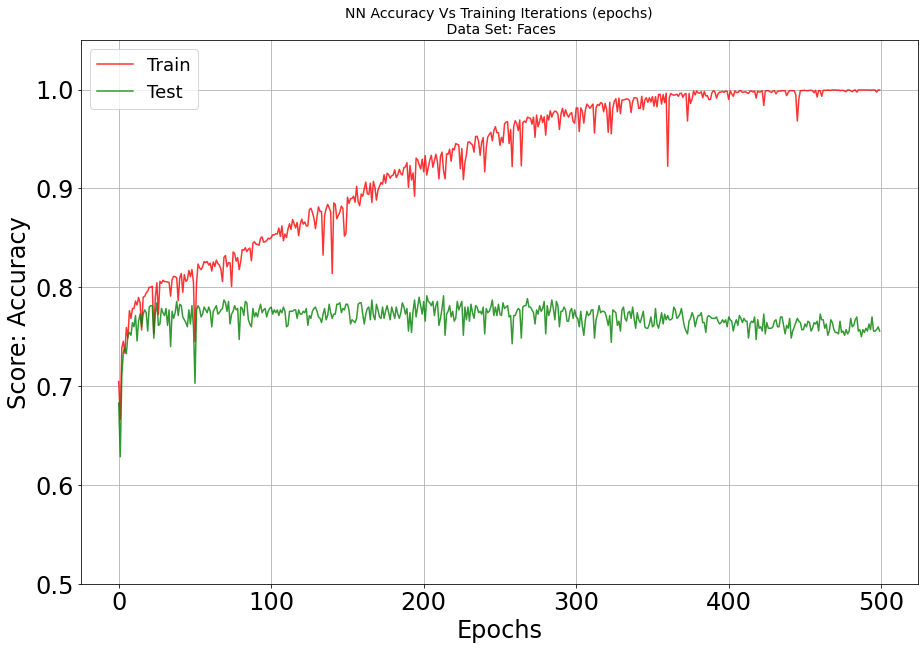

In [6]:
def loss_curve(X_train, y_train, mlp, N_EPOCHS=500, N_BATCH=64):
    # https://stackoverflow.com/questions/46912557/is-it-possible-to-get-test-scores-for-each-iteration-of-mlpclassifier
    N_TRAIN_SAMPLES = X_train.shape[0]
    N_CLASSES = np.unique(y_train)

    scores_train = []
    scores_test = []

    # EPOCH
    epoch = 0
    print("Running Epochs: ", end='')
    while epoch < N_EPOCHS:
        print(epoch, end=' ')
        # SHUFFLING
        random_perm = np.random.permutation(X_train.shape[0])
        mini_batch_index = 0
        while True:
            # MINI-BATCH
            indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
            t = X_train[indices]
            x = y_train[indices]
            mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
            mini_batch_index += N_BATCH

            if mini_batch_index >= N_TRAIN_SAMPLES:
                break

        # SCORE TRAIN
        scores_train.append(mlp.score(X_train, y_train))

        # SCORE TEST
        scores_test.append(mlp.score(X_test, y_test))

        epoch += 1
    print()
    return scores_train, scores_test

def plot_loss_curve(scores_train, scores_test, ALGO, DATASET, ylim, legend_loc="upper left"):
    title_fontsize = 24
    fontsize = 24
    legend_fontsize = 18
    
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.rcParams["figure.figsize"] = (15,10)

    title = "{} Accuracy Vs Training Iterations (epochs)\n Data Set: {}".format(ALGO, DATASET)

    plt.plot(scores_train, color='red', alpha=0.8, label='Train')
    plt.plot(scores_test, color='green', alpha=0.8, label='Test')
    plt.title(title, fontsize=14)
    plt.xlabel('Epochs', fontsize=fontsize)
    plt.ylabel("Score: Accuracy", fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=legend_fontsize)
    plt.grid()
    plt.ylim(ylim)
    plt.show()


scores_train, scores_test = loss_curve(X_train.to_numpy(), y_train.to_numpy(), MLPClassifier())
plot_loss_curve(scores_train, scores_test, ALGO, DATASET, ylim=ylim)


In [7]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times\
= TrainingCurves.perform_learning_curve(MLPClassifier(), X_train, y_train, "accuracy")

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

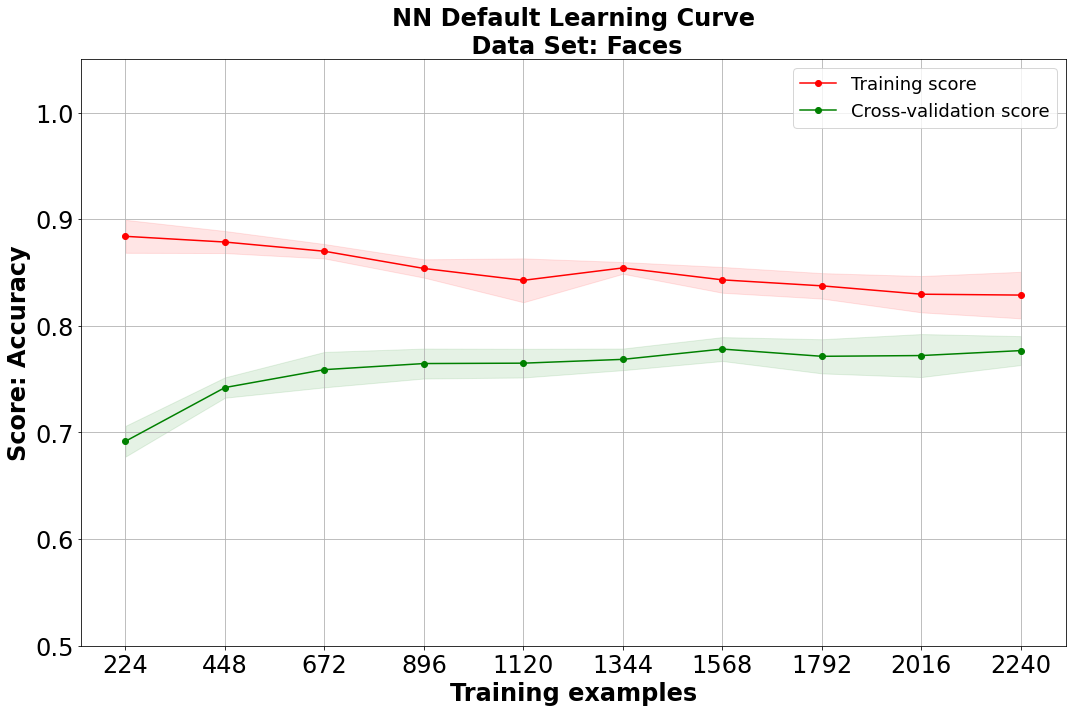

In [9]:
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    3.1s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   15.6s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   27.7s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   38.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   48.4s remaining:   56.8s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  1.0min remaining:   47.0s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  1.2min remaining:   34.9s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  1.4min remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  1.7min remaining:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


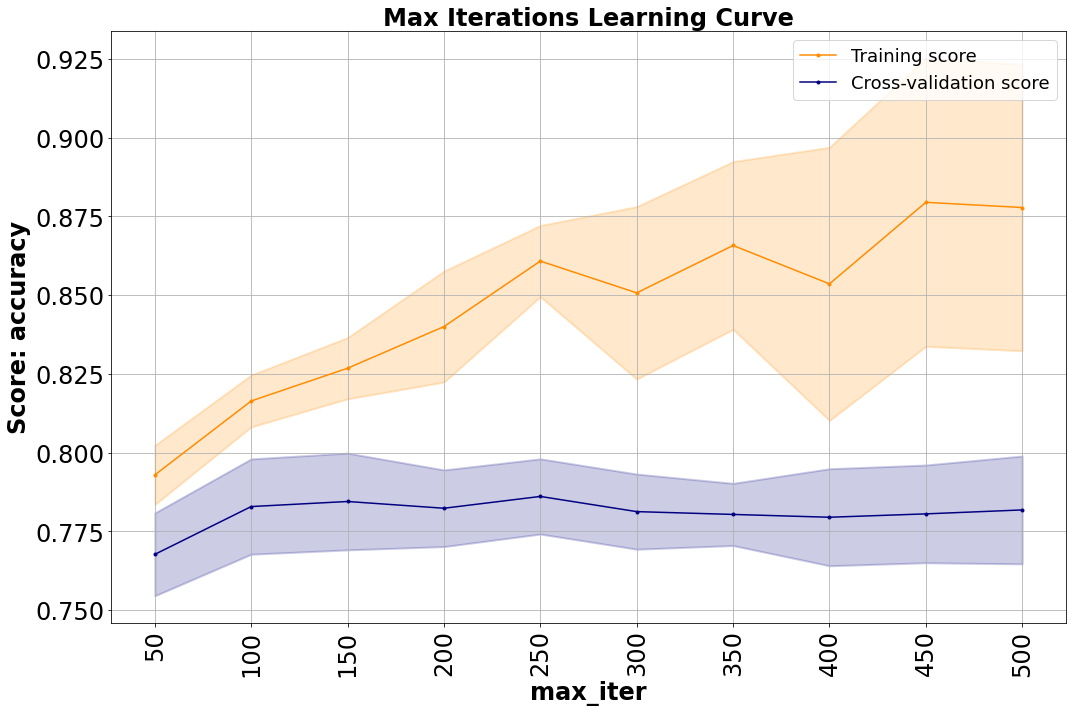

In [36]:
max_iter=[i for i in range(50, 550, 50)]
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(), X_train, y_train, 'max_iter', max_iter, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_iter", max_iter, title="Max Iterations Learning Curve", scoring="accuracy", tick_spacing=1, rotation='vertical')



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of 160 | elapsed:   20.4s remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  25 out of 160 | elapsed:   49.6s remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  42 out of 160 | elapsed:  1.3min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  59 out of 160 | elapsed:  1.8min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  76 out of 160 | elapsed:  2.5min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  93 out of 160 | elapsed:  3.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done 110 out of 160 | elapsed:  3.7min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done 127 out of 160 | elapsed:  4.2min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 144 out of 160 | elapsed:  4.8min remaining:   31.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.3min finished


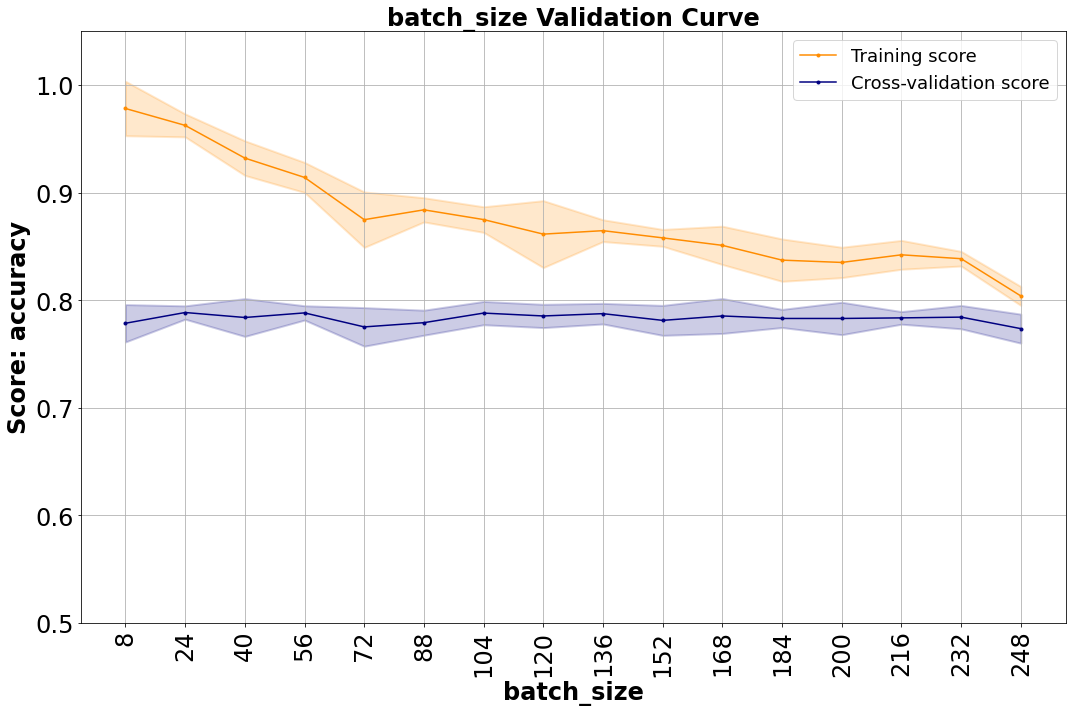

In [30]:
batch_size = [i for i in range(8, 256, 16)]
default_parameters = {}

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'batch_size', batch_size, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "batch_size", batch_size, title="batch_size Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical', ylim=ylim)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  40 | elapsed:    4.7s remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   6 out of  40 | elapsed:    8.4s remaining:   47.6s
[Parallel(n_jobs=-1)]: Done  11 out of  40 | elapsed:   14.0s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done  16 out of  40 | elapsed:   18.5s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done  21 out of  40 | elapsed:   23.2s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done  26 out of  40 | elapsed:   27.2s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:   31.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:   35.8s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   38.1s finished


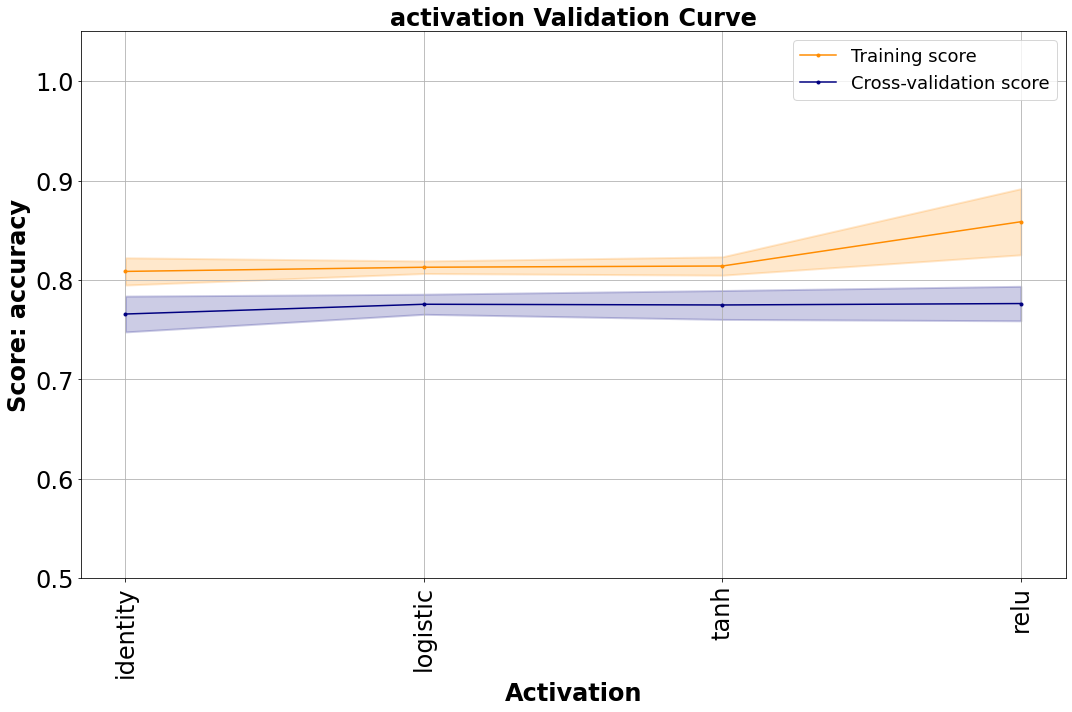

In [42]:
activation = ['identity', 'logistic', 'tanh', 'relu']
default_parameters = {"batch_size": 72}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'activation', activation, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "Activation", activation, title="activation Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical', ylim=ylim)


In [43]:
default_parameters = {"batch_size": 72, "activation": 'logistic'}

In [44]:
learning_rate_init=[i for i in np.arange(0.0005, 0.03, 0.0005)]

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, "learning_rate_init", learning_rate_init, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of 590 | elapsed:   46.9s remaining:  8.3min
[Parallel(n_jobs=-1)]: Done 111 out of 590 | elapsed:  1.6min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done 171 out of 590 | elapsed:  2.5min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done 231 out of 590 | elapsed:  3.3min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done 291 out of 590 | elapsed:  4.2min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done 351 out of 590 | elapsed:  5.0min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done 411 out of 590 | elapsed:  5.9min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done 471 out of 590 | elapsed:  6.7min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done 531 out of 590 | elapsed:  7.8min remaining:   51.9s
[Parallel(n_jobs=-1)]: Done 590 out of 590 | elapsed:  8.6min finished


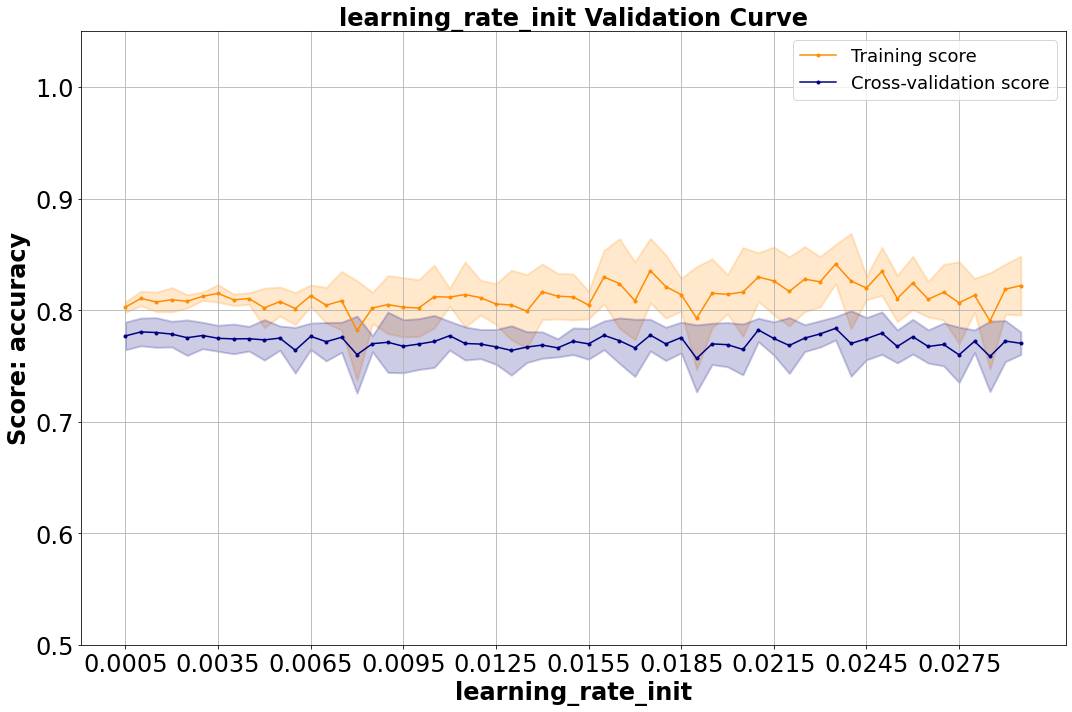

In [40]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate_init", learning_rate_init, title="learning_rate_init Validation Curve", scoring="accuracy", tick_spacing=6, ylim=ylim)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 950 | elapsed:   43.6s remaining:  7.2min
[Parallel(n_jobs=-1)]: Done 183 out of 950 | elapsed:  1.6min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done 279 out of 950 | elapsed:  2.7min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done 375 out of 950 | elapsed:  3.8min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done 471 out of 950 | elapsed:  5.0min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done 567 out of 950 | elapsed:  6.2min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done 663 out of 950 | elapsed:  7.2min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done 759 out of 950 | elapsed:  8.3min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done 855 out of 950 | elapsed:  9.3min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 950 out of 950 | elapsed: 10.8min finished


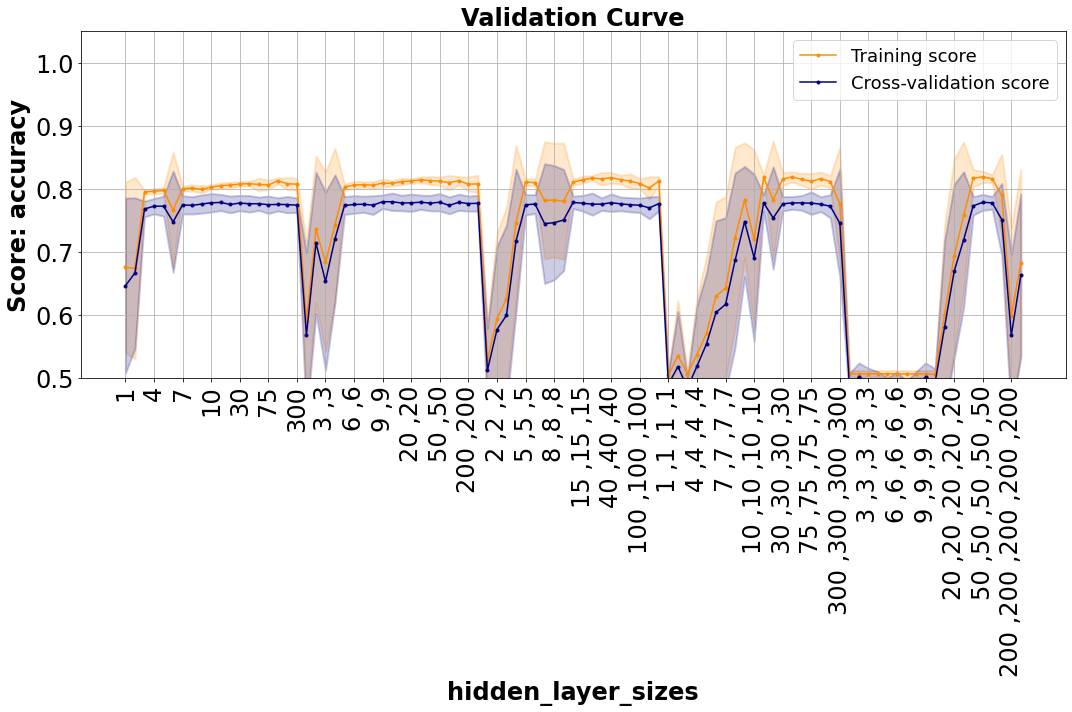

In [41]:
num_nodes_per_layer = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 75, 100, 200, 300]
num_hidden_layers = [i for i in range(1, 6, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)
    

temp_val_score_file_name = 'temp_NN_val_scores_large_layer_variance'

default_parameters = {'max_iter': 150, "batch_size": 72, "activation": 'logistic', 'learning_rate_init': 0.0015}
for key, value in default_parameters.items():
    temp_val_score_file_name += "_{}={}".format(key, str(value))
temp_val_score_file_name += ".pickle"

if(os.path.isfile(temp_val_score_file_name)):
    with open(temp_val_score_file_name, 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
    with open(temp_val_score_file_name, 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=3, rotation='vertical', ylim=ylim)


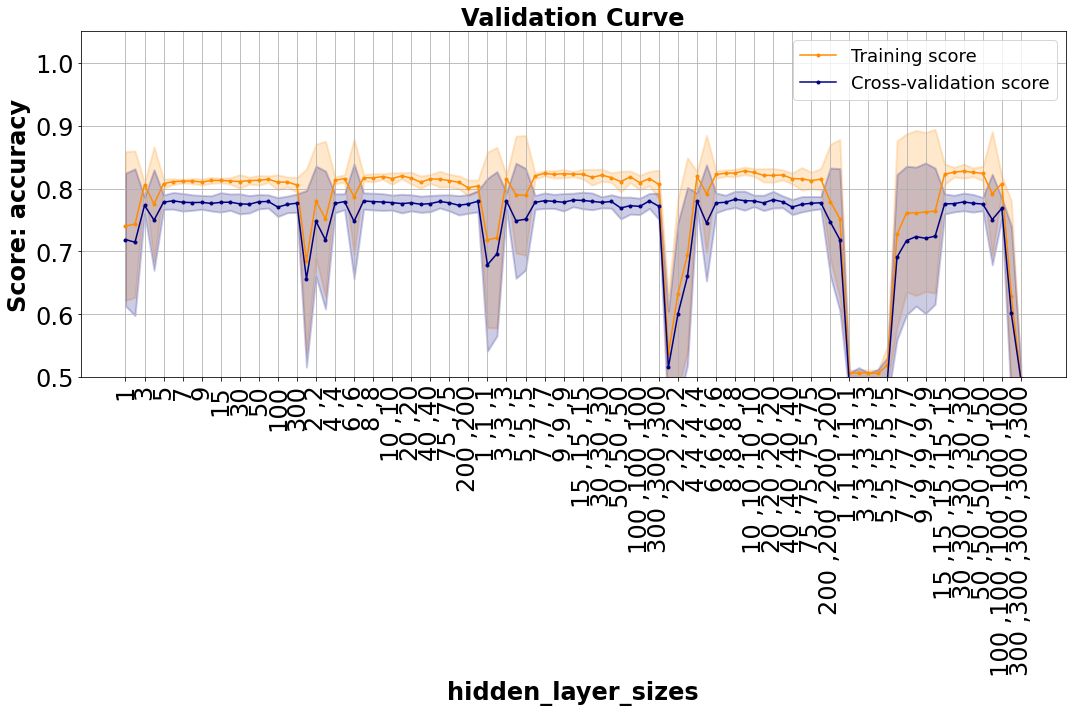

In [27]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=2, rotation='vertical', ylim=ylim)


In [ ]:
# default_parameters = {"batch_size": 64, "activation": 'logistic', 'learning_rate_init': 0.0015}
# train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)

# TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=3, rotation='vertical', ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of 950 | elapsed:   56.3s remaining:  9.3min
[Parallel(n_jobs=-1)]: Done 183 out of 950 | elapsed:  2.1min remaining:  9.0min
[Parallel(n_jobs=-1)]: Done 279 out of 950 | elapsed:  3.5min remaining:  8.5min
[Parallel(n_jobs=-1)]: Done 375 out of 950 | elapsed:  4.8min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done 471 out of 950 | elapsed:  6.1min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done 567 out of 950 | elapsed:  7.0min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done 663 out of 950 | elapsed:  8.3min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done 759 out of 950 | elapsed:  9.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done 855 out of 950 | elapsed: 10.4min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 950 out of 950 | elapsed: 11.7min finished


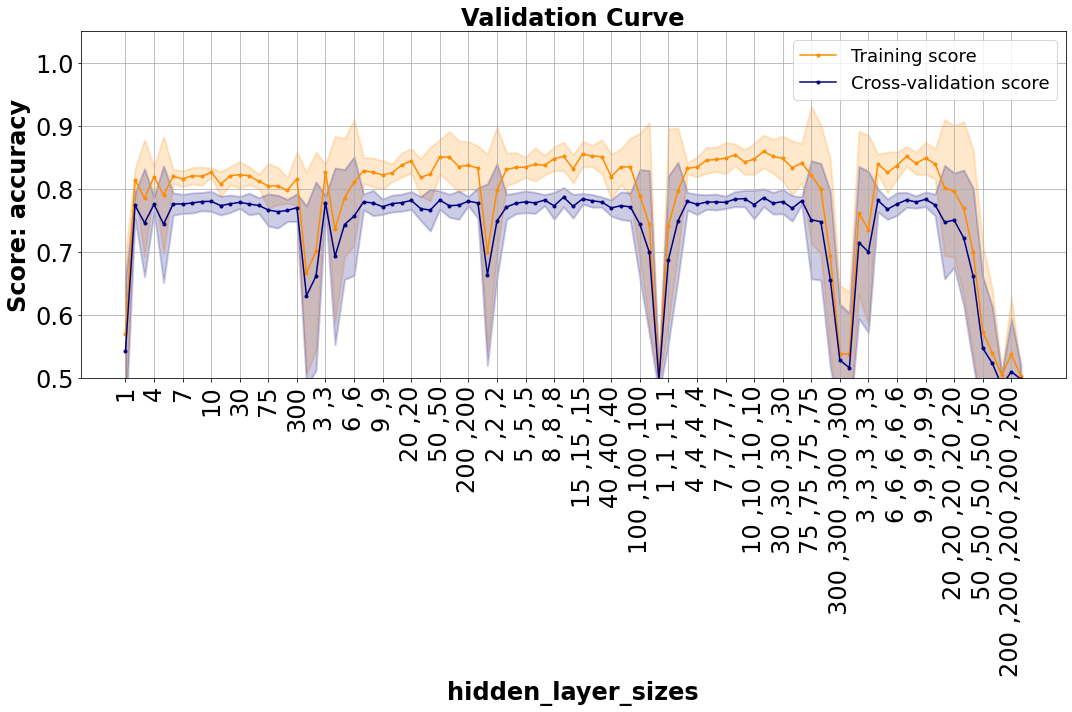

In [28]:
default_parameters['learning_rate_init'] = 0.007
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=3, rotation='vertical', ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of 540 | elapsed:   23.8s remaining:  4.3min
[Parallel(n_jobs=-1)]: Done 101 out of 540 | elapsed:   55.7s remaining:  4.0min
[Parallel(n_jobs=-1)]: Done 156 out of 540 | elapsed:  1.4min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done 211 out of 540 | elapsed:  2.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done 266 out of 540 | elapsed:  2.5min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done 321 out of 540 | elapsed:  3.1min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done 376 out of 540 | elapsed:  3.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done 431 out of 540 | elapsed:  4.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 486 out of 540 | elapsed:  4.6min remaining:   30.9s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.2min finished


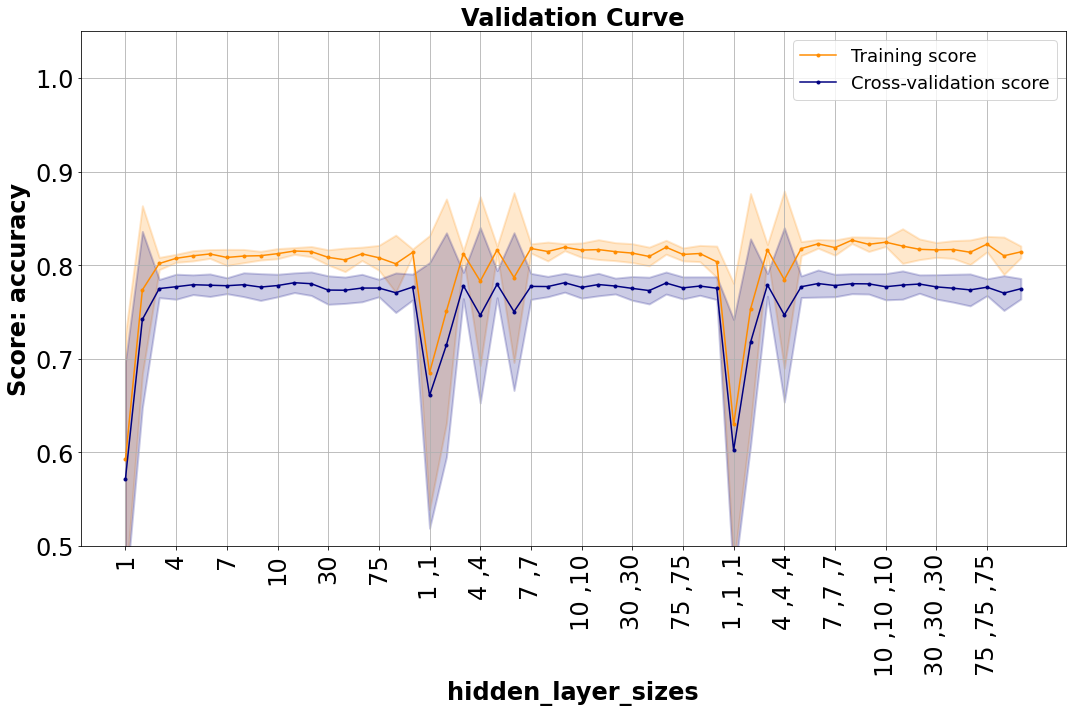

In [29]:
num_nodes_per_layer = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 75, 100, 200]
num_hidden_layers = [i for i in range(1, 4, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)
    
temp_val_score_file_name = 'temp_NN_val_scores_GS_layer_variance'

default_parameters = {'max_iter': 150, "batch_size": 72, "activation": 'logistic', 'learning_rate_init': 0.0015}
for key, value in default_parameters.items():
    temp_val_score_file_name += "_{}={}".format(key, str(value))
temp_val_score_file_name += ".pickle"


if(os.path.isfile(temp_val_score_file_name)):
    with open(temp_val_score_file_name, 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
    with open(temp_val_score_file_name, 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=3, rotation='vertical', ylim=ylim)


In [ ]:
num_nodes_per_layer = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 75, 100, 200]
num_hidden_layers = [i for i in range(1, 4, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)
    
learning_rate_init=[i for i in np.arange(0.0005, 0.03, 0.0005)]
default_parameters = {'max_iter': 150, 'batch_size': 72, 'activation': 'logistic'}

parameters = {'learning_rate_init': learning_rate_init, 'hidden_layer_sizes': hidden_layer_sizes}


gs = common_NN.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', default_parameters=default_parameters, GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

Grid Search Will be Saved to  Analysis_Data/FACES_NN_DATA_learning_rate_init_0.0005-0.029500000000000002_hidden_layer_sizes_[1]-[200, 200, 200].pickle
Fitting 5 folds for each of 3186 candidates, totalling 15930 fits


/home/intuision/Documents/richard/SupervisedLearning_Project_Code/common_grid_search_analysis.py:225: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(np.array(param_values[plot_param])[mask])


Plot saved as:  Figures/Faces_NN_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


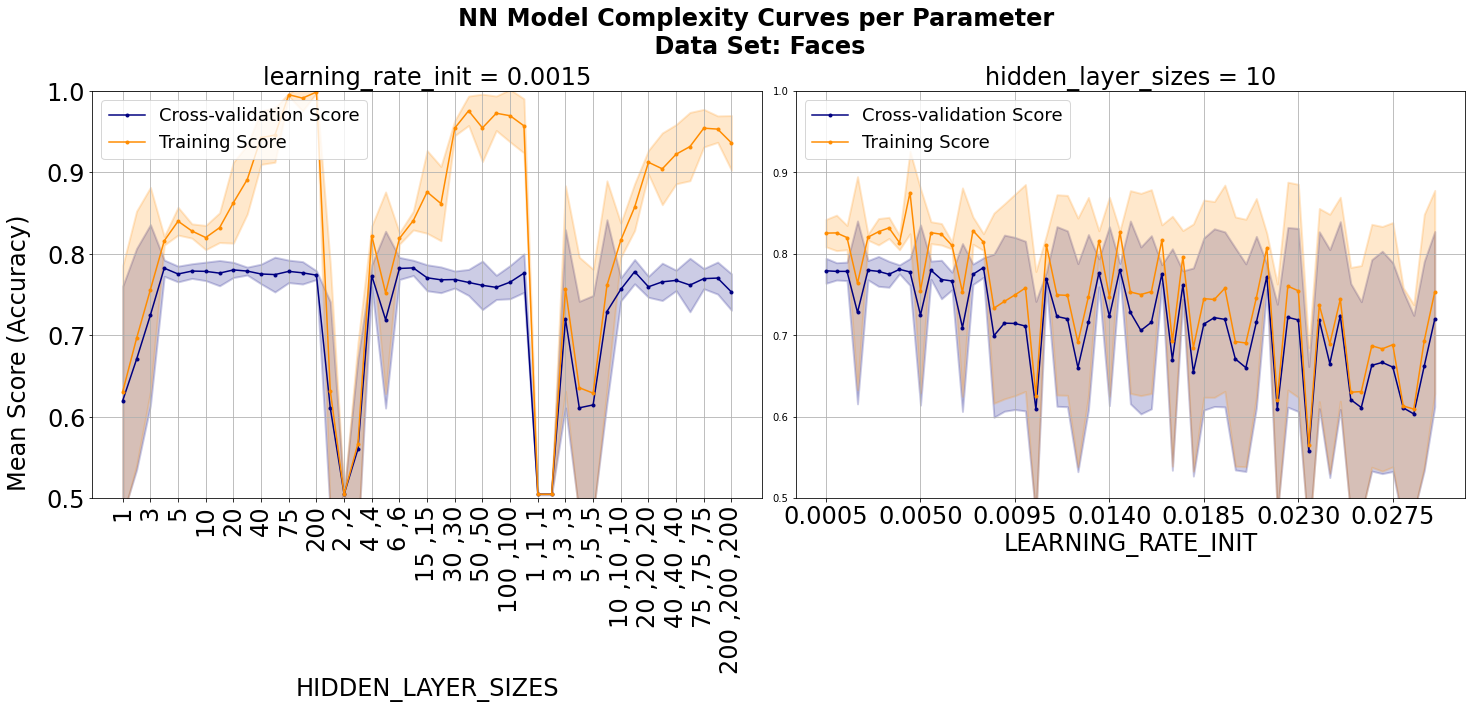

In [6]:
unused_params = {'learning_rate_init': 0.0015, 'hidden_layer_sizes': [10]}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, tick_spacing=[2, 9], ylim=ylim, legend_loc="upper left")

/home/intuision/Documents/richard/SupervisedLearning_Project_Code/common_grid_search_analysis.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(np.array(param_values[plot_param])[mask])


Plot saved as:  Figures/Faces_NN_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


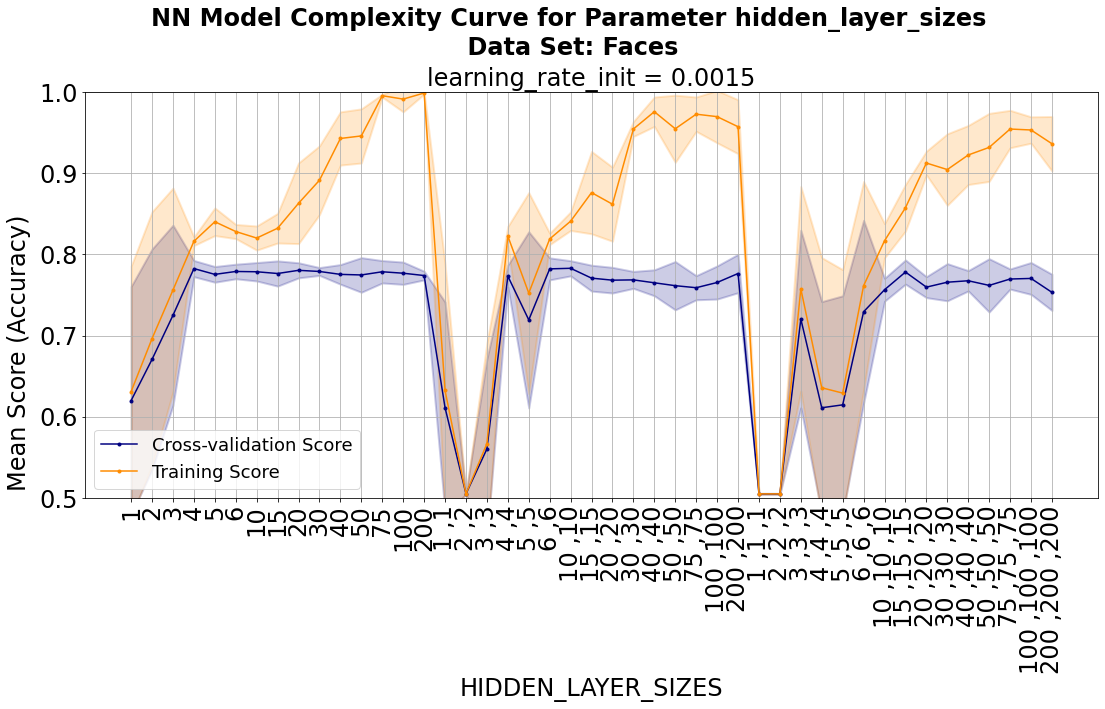

Plot saved as:  Figures/Faces_NN_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


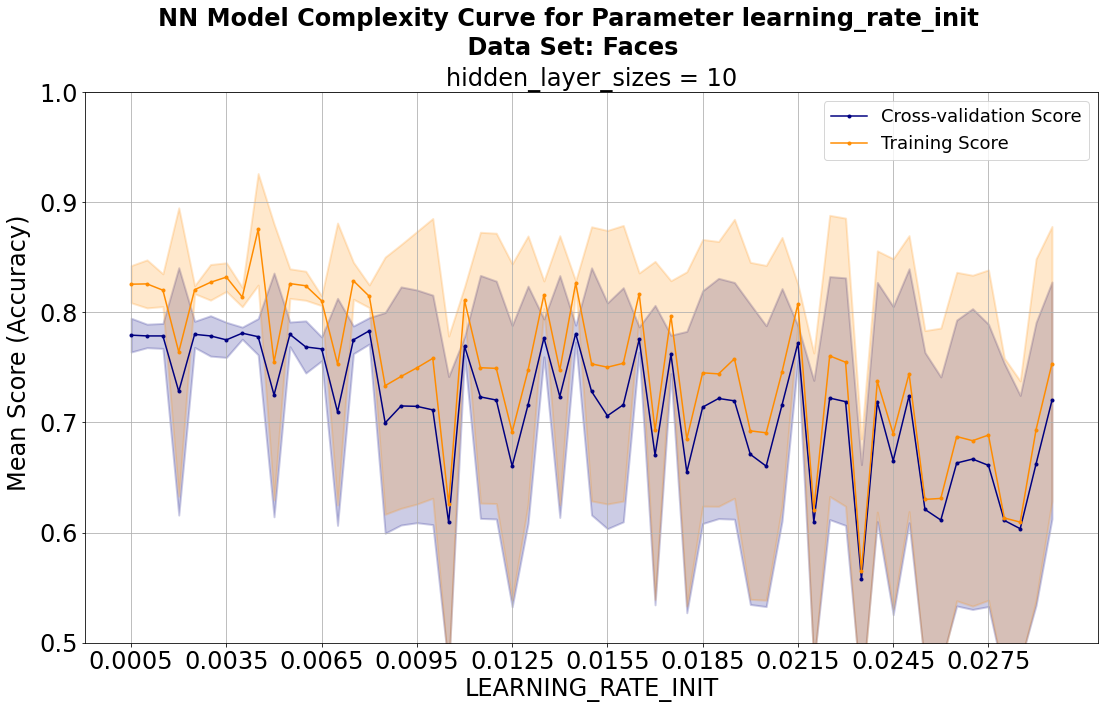

Plot saved as:  Figures/Faces_NN_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


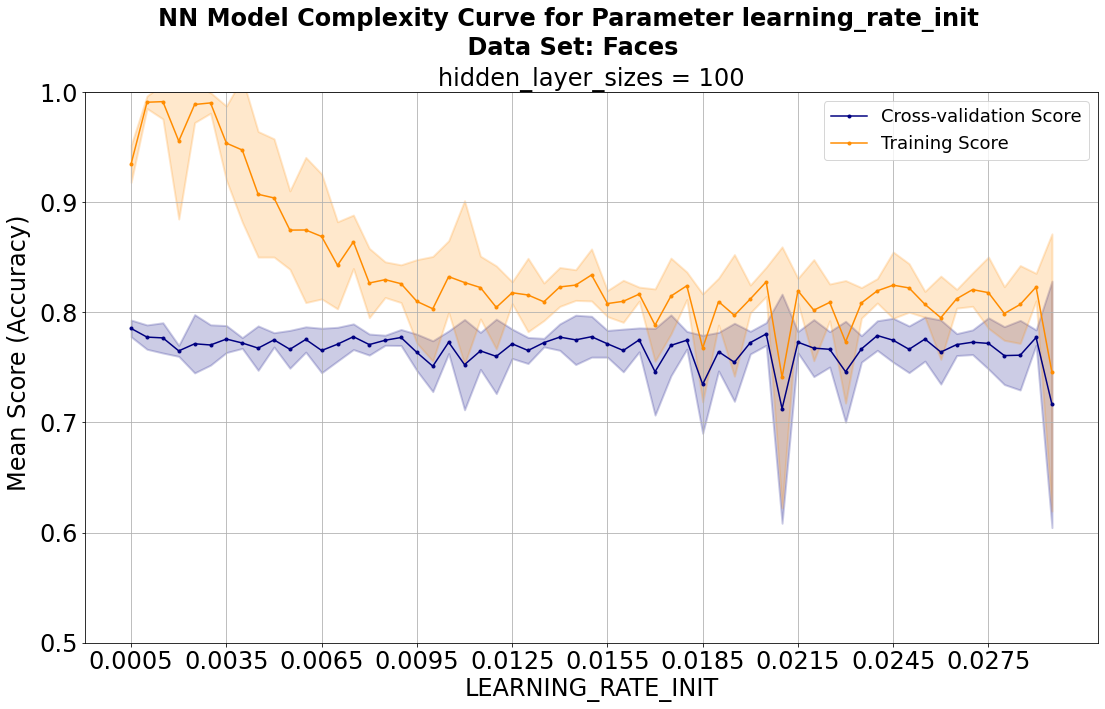

In [7]:
unused_params = {'learning_rate_init': 0.0015, 'hidden_layer_sizes': [10]}
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'hidden_layer_sizes', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'learning_rate_init', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params,tick_spacing=6, ylim=ylim)
unused_params = {'learning_rate_init': 0.0015, 'hidden_layer_sizes': [100]}
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'learning_rate_init', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params,tick_spacing=6, ylim=ylim, legend_loc='upper right')


/home/intuision/Documents/richard/SupervisedLearning_Project_Code/common_grid_search_analysis.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(np.array(param_values[plot_param])[mask])


Plot saved as:  Figures/Faces_NN_GS_Times_hidden_layer_sizes_learning_rate_init.png


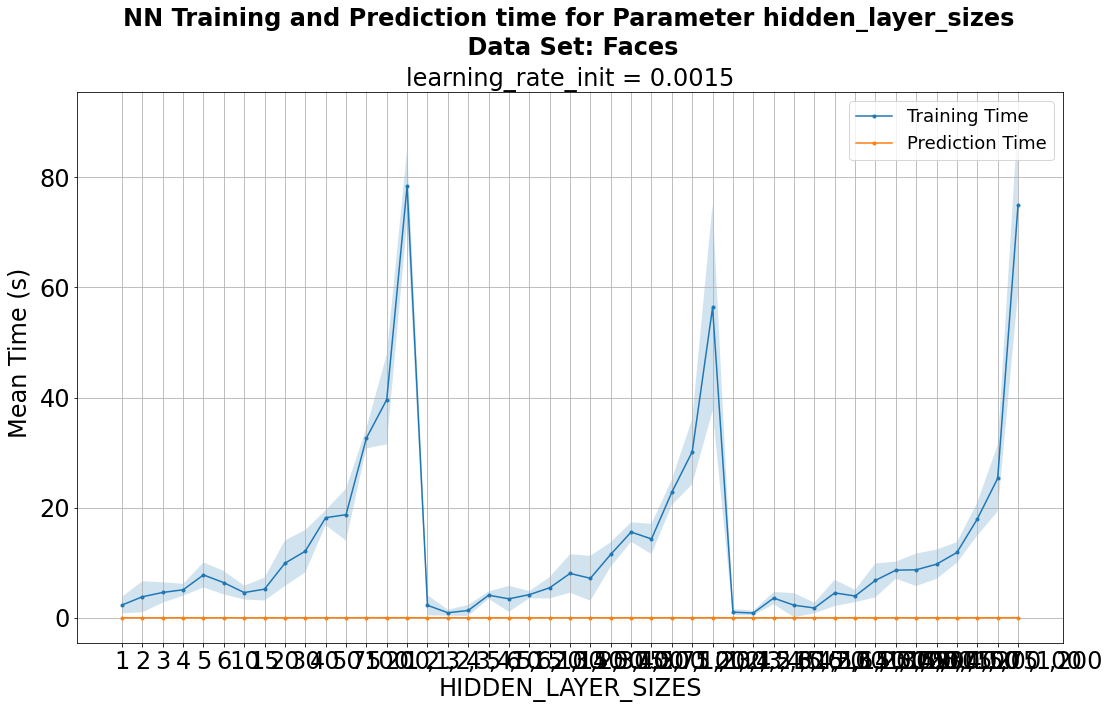

Plot saved as:  Figures/Faces_NN_GS_Times_hidden_layer_sizes_learning_rate_init.png


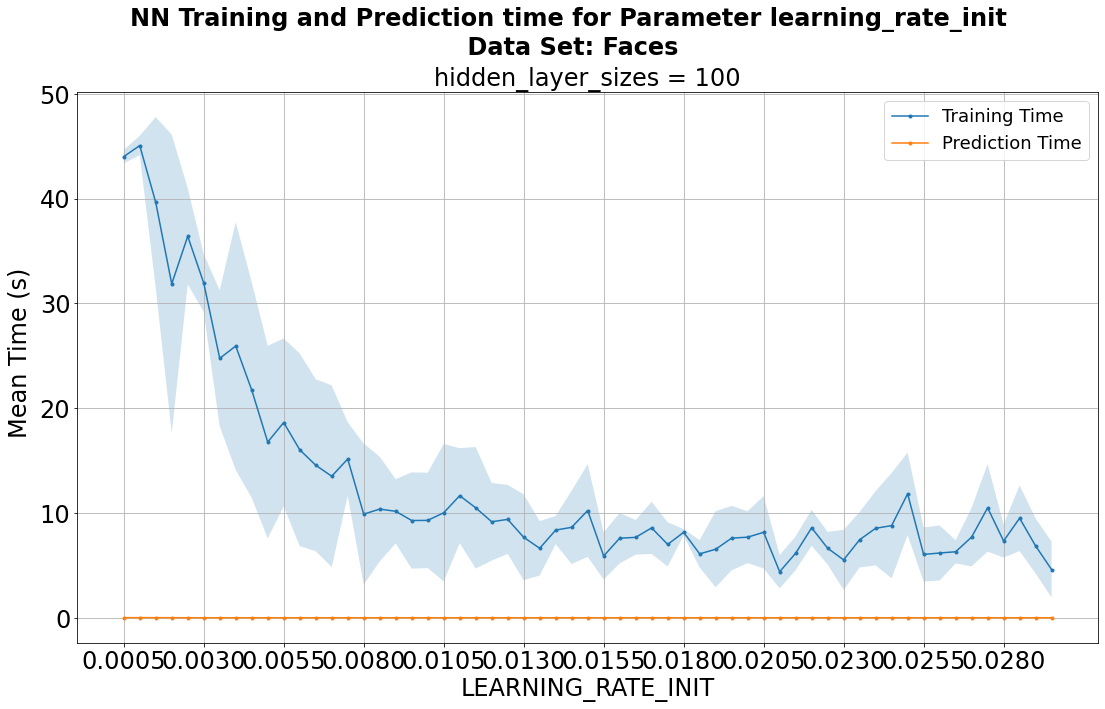

In [8]:
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'hidden_layer_sizes', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params)
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'learning_rate_init', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params,tick_spacing=5)

In [ ]:
test_parameters = {'batch_size': 64, 'learning_rate_init': 0.0015, 'hidden_layer_sizes': [100], 'activation': 'logistic'}
max_iter=[i for i in range(100, 800, 50)]


title = "{} {} Validation Curve ".format(DATASET, ALGO)
for key, value in test_parameters.items():
    title += "{} = {} ".format(key, str(value))

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**test_parameters), X_train, y_train, 'max_iter', max_iter, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_iter", max_iter, title=title, scoring="accuracy", tick_spacing=1, rotation='vertical')


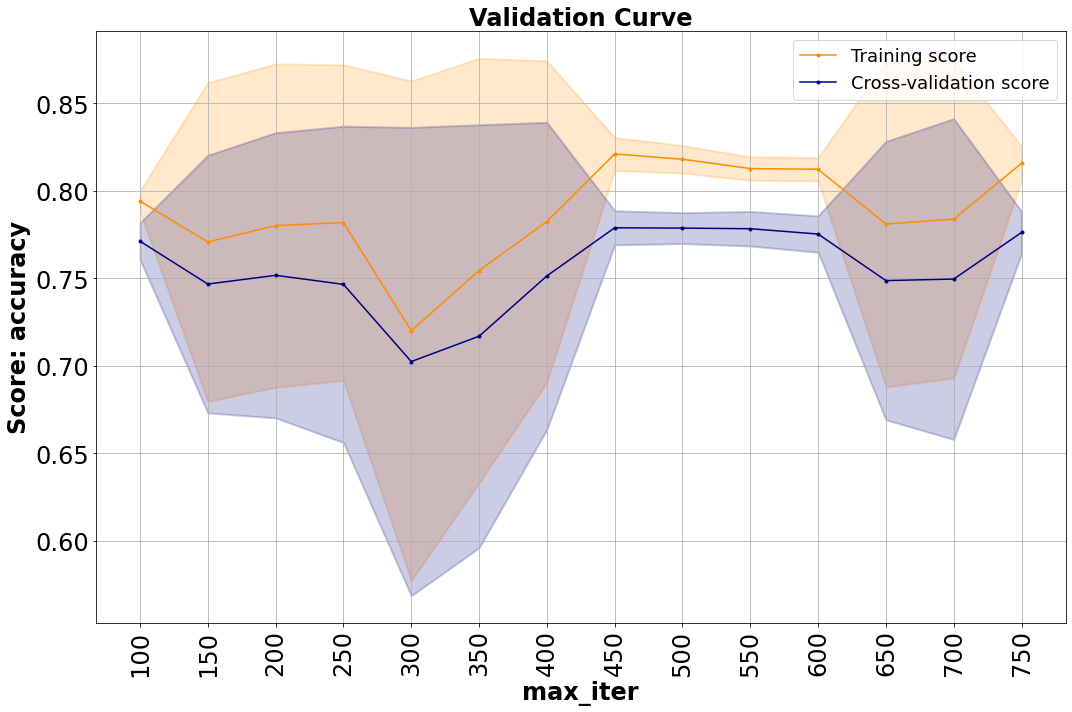

In [25]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_iter", max_iter, title="Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical')


In [28]:
final_parameters = {'max_iter': 500, 'batch_size': 64, 'learning_rate_init': 0.0015, 'hidden_layer_sizes': [10], 'activation':'logistic'}
# Final Learning Curve
train_sizes, train_scores, test_scores, fit_times, score_times\
= TrainingCurves.perform_learning_curve(MLPClassifier(**final_parameters), X_train, y_train, "accuracy")

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

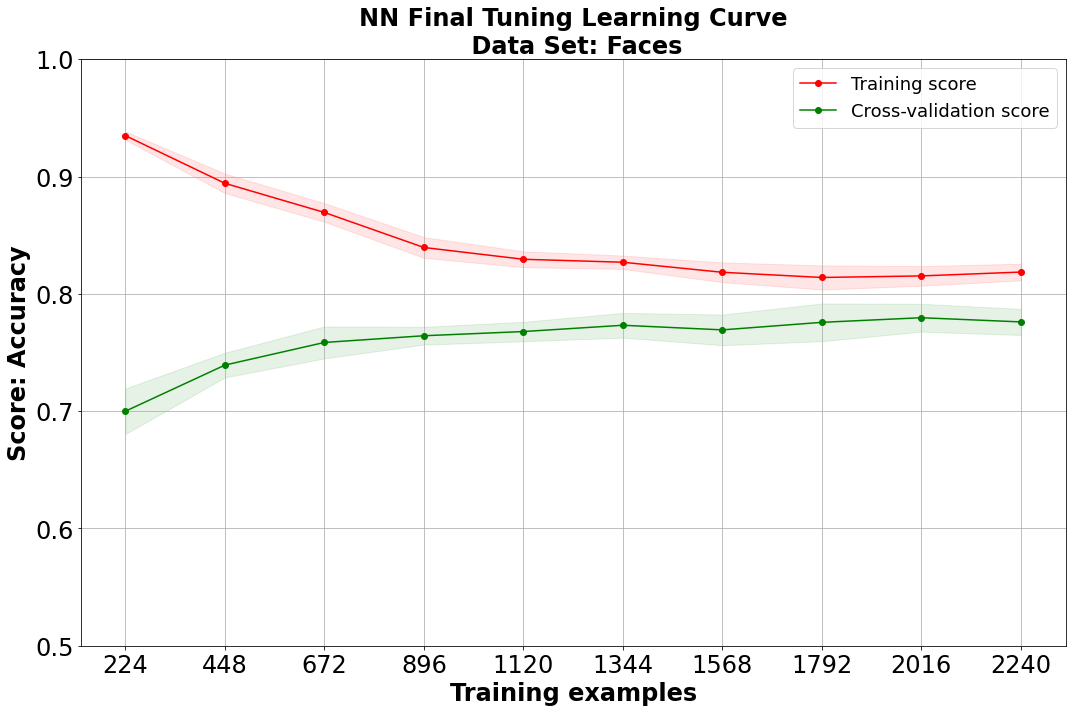

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of 190 | elapsed:    5.9s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  31 out of 190 | elapsed:   14.7s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  51 out of 190 | elapsed:   22.7s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  71 out of 190 | elapsed:   31.6s remaining:   53.0s
[Parallel(n_jobs=-1)]: Done  91 out of 190 | elapsed:   39.5s remaining:   43.0s
[Parallel(n_jobs=-1)]: Done 111 out of 190 | elapsed:   48.9s remaining:   34.8s
[Parallel(n_jobs=-1)]: Done 131 out of 190 | elapsed:   56.5s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done 151 out of 190 | elapsed:  1.1min remaining:   16.8s
[Parallel(n_jobs=-1)]: Done 171 out of 190 | elapsed:  1.2min remaining:    8.1s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:  1.4min finished


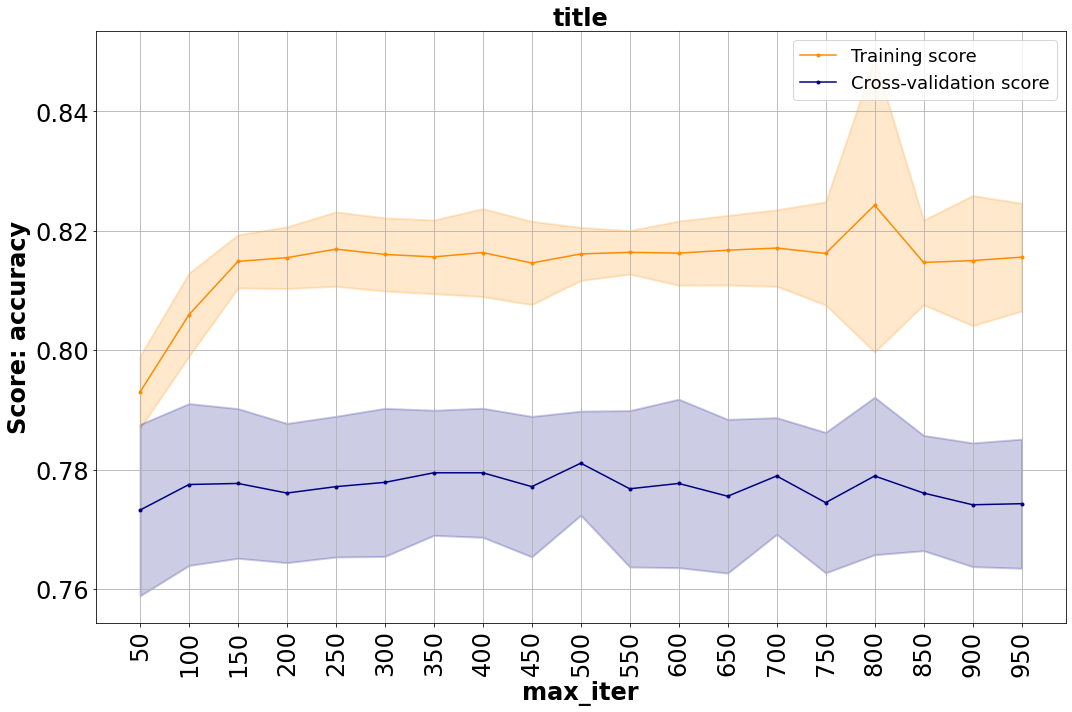

In [30]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)

max_iter=[i for i in range(50, 1000, 50)]
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**final_parameters), X_train, y_train, 'max_iter', max_iter, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_iter", max_iter, title="title", scoring="accuracy", tick_spacing=1, rotation='vertical')


/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

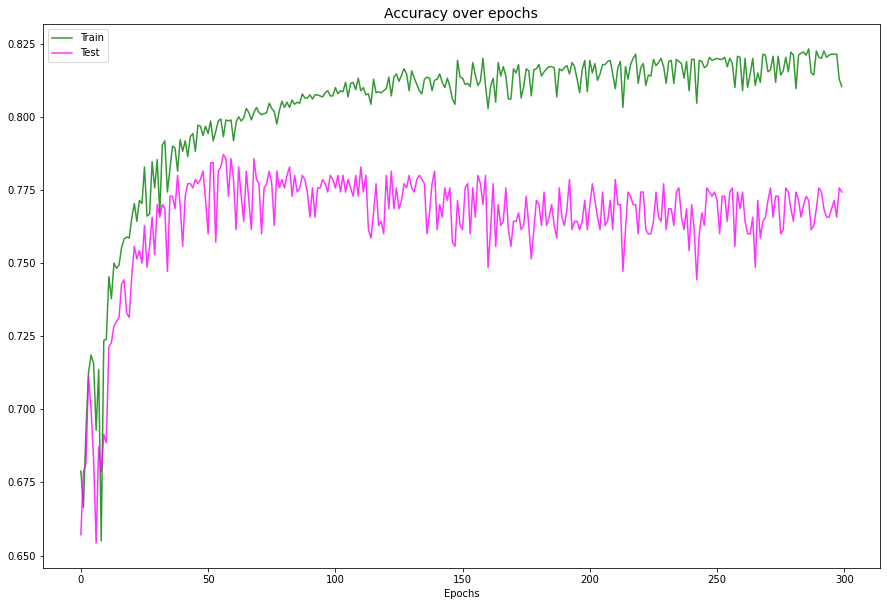

In [34]:
final_parameters = {'max_iter': 500, 'batch_size': 64, 'learning_rate_init': 0.0015, 'hidden_layer_sizes': [10], 'activation':'logistic'}
scores_train, scores_test = loss_curve(X_train.to_numpy(), y_train.to_numpy(), MLPClassifier(**final_parameters))
plot_loss_curve(scores_train, scores_test)

In [32]:
print("Default Fit Time: {} seconds".format(np.mean(default_fit_times, axis=1)[-1]))
print("Default Predict Time {} seconds".format(np.mean(default_score_times, axis=1)[-1]))

print("Final Fit Time: {}".format(np.mean(fit_times, axis=1)[-1]))
print("Final Predict Time: {}".format(np.mean(score_times, axis=1)[-1]))

Default Fit Time: 1.9462365627288818 seconds
Default Predict Time 0.0034325122833251953 seconds
Final Fit Time: 1.949895191192627
Final Predict Time: 0.0021426200866699217


In [11]:
final_parameters = {'max_iter': 500, 'batch_size': 64, 'learning_rate_init': 0.0015, 'hidden_layer_sizes': [10]}
clf = MLPClassifier(**final_parameters)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

final_parameters = {'max_iter': 500, 'batch_size': 64, 'learning_rate_init': 0.0015, 'hidden_layer_sizes': [5]}
clf = MLPClassifier(**final_parameters)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

0.7989285714285714
0.81


In [ ]:
print(clf.score(X_test, y_test))